In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [63]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [64]:
# checking size of data
df.shape

(8523, 12)

In [65]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Checking nulls


In [66]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Treating null values

In [67]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [68]:
#treating nulls in Item_Weight
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [69]:
df['Item_Weight'].isna().sum()

4

In [70]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [71]:
df['Item_Weight'].isna().sum()

0

In [72]:
# treating nulls in Outlet_Size 
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Since most occuring is medium size store so we will fill nan with medium.

In [73]:
df['Outlet_Size'] = df['Outlet_Size'].fillna("Medium")


In [74]:
df['Outlet_Size'].isna().sum()

0

## Encoding nominal and categorical data

In [75]:
# Encoding  Item_Identifier
oe=OrdinalEncoder()
df1=oe.fit_transform(df[['Item_Identifier']])
df['Item_Identifier']=df1
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8.0,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662.0,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121.0,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,1297.0,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [76]:
# Encoding  Item_Fat_Content
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [77]:
oe=OrdinalEncoder()
df1=oe.fit_transform(df[['Item_Fat_Content']])
df['Item_Fat_Content']=df1
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,1.0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8.0,5.92,2.0,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662.0,17.50,1.0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121.0,19.20,2.0,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,1297.0,8.93,1.0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [78]:
# Encoding  Item_Type
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [79]:
oe=OrdinalEncoder()
df1=oe.fit_transform(df[['Item_Type']])
df['Item_Type']=df1
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,1.0,0.016047,4.0,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8.0,5.92,2.0,0.019278,14.0,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662.0,17.50,1.0,0.016760,10.0,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121.0,19.20,2.0,0.000000,6.0,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,1297.0,8.93,1.0,0.000000,9.0,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [80]:
# Encoding  Item_Type
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [81]:
oe=OrdinalEncoder()
df1=oe.fit_transform(df[['Outlet_Identifier']])
df['Outlet_Identifier']=df1
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,1.0,0.016047,4.0,249.8092,9.0,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8.0,5.92,2.0,0.019278,14.0,48.2692,3.0,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662.0,17.50,1.0,0.016760,10.0,141.6180,9.0,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121.0,19.20,2.0,0.000000,6.0,182.0950,0.0,1998,Medium,Tier 3,Grocery Store,732.3800
4,1297.0,8.93,1.0,0.000000,9.0,53.8614,1.0,1987,High,Tier 3,Supermarket Type1,994.7052


In [82]:
# Encoding  Outlet_Size
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [83]:
oe=OrdinalEncoder()
df1=oe.fit_transform(df[['Outlet_Size']])
df['Outlet_Size']=df1
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,Tier 1,Supermarket Type1,3735.1380
1,8.0,5.92,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,Tier 3,Supermarket Type2,443.4228
2,662.0,17.50,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,Tier 1,Supermarket Type1,2097.2700
3,1121.0,19.20,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,Tier 3,Grocery Store,732.3800
4,1297.0,8.93,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,Tier 3,Supermarket Type1,994.7052


In [84]:
#Encoding  Outlet_Location_Type
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [85]:
oe=OrdinalEncoder()
df1=oe.fit_transform(df[['Outlet_Location_Type']])
df['Outlet_Location_Type']=df1
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,Supermarket Type1,3735.1380
1,8.0,5.92,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,Supermarket Type2,443.4228
2,662.0,17.50,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,Supermarket Type1,2097.2700
3,1121.0,19.20,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,Grocery Store,732.3800
4,1297.0,8.93,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,Supermarket Type1,994.7052


In [86]:
#Encoding  Outlet_Type
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [87]:
oe=OrdinalEncoder()
df1=oe.fit_transform(df[['Outlet_Type']])
df['Outlet_Type']=df1
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,1.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.92,2.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.50,1.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.20,2.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.93,1.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052


## Visualizing relation between features and label

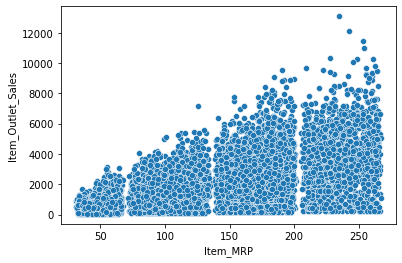

In [88]:
#Relation between Item_MRP and Item_Outlet_Sales
a=sns.scatterplot(x=df['Item_MRP'],y=df['Item_Outlet_Sales'],data=df)
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

As the item price increases sales of that item increases, lesser the price lesser the sales.

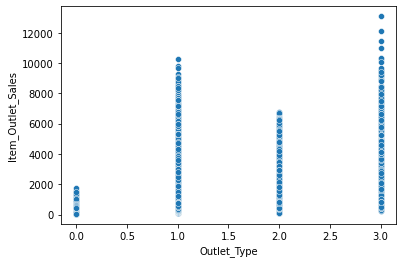

In [89]:
#Relation between Outlet_Type and Item_Outlet_Sales
a=sns.scatterplot(x=df['Outlet_Type'],y=df['Item_Outlet_Sales'],data=df)
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

The sales in grocery store is least and the sale in supermarket_type_3 is maximum.

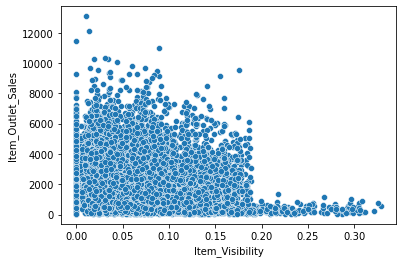

In [90]:
#Relation between Item_Visibility and Item_Outlet_Sales
a=sns.scatterplot(x=df['Item_Visibility'],y=df['Item_Outlet_Sales'],data=df)
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

Lesser the visibility, higher the sale. Sales is between 0 to 1000 if visibility is between 0.18 to 0.32.

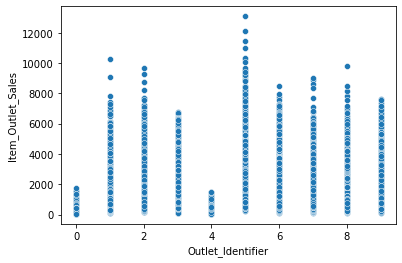

In [91]:
#Relation between Outlet_Identifier and Item_Outlet_Sales
a=sns.scatterplot(x=df['Outlet_Identifier'],y=df['Item_Outlet_Sales'],data=df)
plt.xlabel('Outlet_Identifier')
plt.ylabel('Item_Outlet_Sales')
plt.show()

Highest sale is in OUT027 which has medium outlet size and is of Supermarket 3 outlet type whereas least sales is in OUT010.

In [92]:
df.loc[df['Outlet_Identifier']==5]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,738.0,19.000,1.0,0.127470,13.0,107.7622,5.0,1985,1.0,2.0,3.0,4022.7636
18,79.0,8.260,1.0,0.034238,7.0,113.2834,5.0,1985,1.0,2.0,3.0,2303.6680
21,1076.0,8.315,2.0,0.035400,0.0,144.5444,5.0,1985,1.0,2.0,3.0,4064.0432
36,1032.0,20.200,2.0,0.059512,6.0,128.0678,5.0,1985,1.0,2.0,3.0,2797.6916
38,1124.0,6.385,2.0,0.123111,13.0,36.9874,5.0,1985,1.0,2.0,3.0,388.1614
...,...,...,...,...,...,...,...,...,...,...,...,...
8472,1485.0,12.850,1.0,0.053185,8.0,182.9608,5.0,1985,1.0,2.0,3.0,1653.8472
8485,108.0,5.000,1.0,0.043792,14.0,189.0530,5.0,1985,1.0,2.0,3.0,6261.8490
8487,53.0,17.250,1.0,0.037006,14.0,164.7526,5.0,1985,1.0,2.0,3.0,4111.3150
8488,1408.0,19.100,1.0,0.091473,11.0,184.6608,5.0,1985,1.0,2.0,3.0,2756.4120


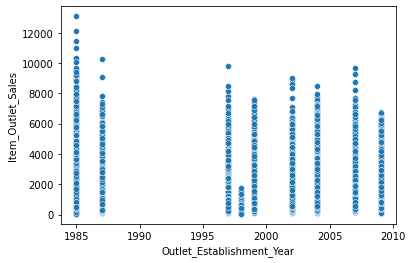

In [93]:
#Relation between Outlet_Establishment_Year and Item_Outlet_Sales
a=sns.scatterplot(x=df['Outlet_Establishment_Year'],y=df['Item_Outlet_Sales'],data=df)
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')
plt.show()

Older the outlet higher is the sales.

## Correlation between features and label

In [94]:
df.corr().abs()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.048281,0.098114,0.025482,0.017973,0.012853,0.008602,0.012772,0.001389,0.003656,0.001178,0.002869
Item_Weight,0.048281,1.000000,0.022143,0.009168,0.035688,0.025972,0.007591,0.013418,0.004305,0.002937,0.000537,0.013165
Item_Fat_Content,0.098114,0.022143,1.000000,0.034042,0.115958,0.000876,0.002357,0.000189,0.012058,0.004102,0.004214,0.009800
Item_Visibility,0.025482,0.009168,0.034042,1.000000,0.035249,0.001315,0.100439,0.074834,0.069309,0.028099,0.173468,0.128625
Item_Type,0.017973,0.035688,0.115958,0.035249,1.000000,0.032651,0.001656,0.004970,0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.025972,0.000876,0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,0.001975,0.567574
Outlet_Identifier,0.008602,0.007591,0.002357,0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,0.716176,0.099873,0.162325
Outlet_Establishment_Year,0.012772,0.013418,0.000189,0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,0.089216,0.122304,0.049135
Outlet_Size,0.001389,0.004305,0.012058,0.069309,0.001859,0.006059,0.504603,0.193389,1.000000,0.614311,0.201483,0.086182
Outlet_Location_Type,0.003656,0.002937,0.004102,0.028099,0.003084,0.000232,0.716176,0.089216,0.614311,1.000000,0.467219,0.089367


<AxesSubplot:>

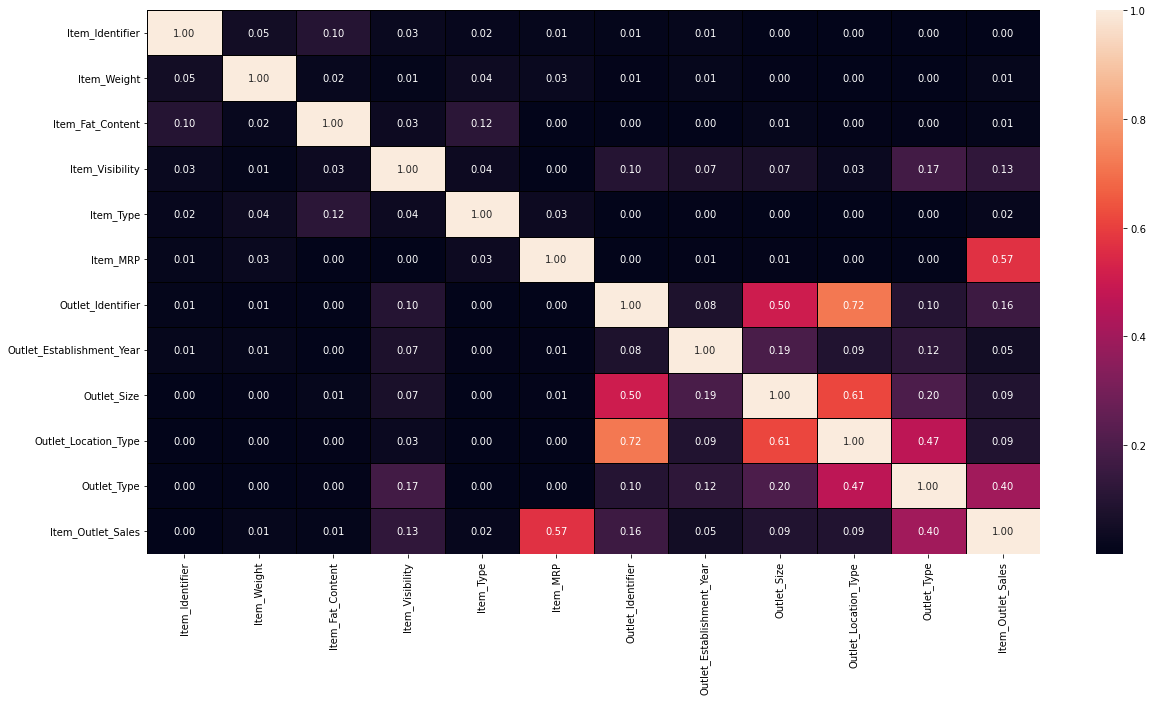

In [95]:
#Plotting heat map
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

From the above heat map we could see that NO MULTICOLLINEARITY EXISTS. Features Item_Identifier, Item_Weight,Item_Fat_Content,Item_Type,Outlet_Establishment_year,outlet_Size,Outlet_Location_Type are least related with the Item_Outlet_Sales. Features like Item_MRP and Outlet_Type are most related with Item_outlet_Sales.

In [96]:
#Assigning mean in place of 0 in Item_Visibility feature
avg=df.groupby('Item_Identifier')['Item_Visibility'].transform('mean')
print(avg)
missing_values = (df['Item_Visibility'] == 0)
df.loc[missing_values,'Item_Visibility'] = avg


0       0.017387
1       0.019219
2       0.020145
3       0.015274
4       0.008082
          ...   
8518    0.061705
8519    0.046952
8520    0.035203
8521    0.120686
8522    0.051565
Name: Item_Visibility, Length: 8523, dtype: float64


In [97]:
# changing establishment year to number of years since established
df['Outlet_Establishment_Year']=2022-df['Outlet_Establishment_Year']

In [98]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,1.0,0.016047,4.0,249.8092,9.0,23,1.0,0.0,1.0,3735.1380
1,8.0,5.92,2.0,0.019278,14.0,48.2692,3.0,13,1.0,2.0,2.0,443.4228
2,662.0,17.50,1.0,0.016760,10.0,141.6180,9.0,23,1.0,0.0,1.0,2097.2700
3,1121.0,19.20,2.0,0.015274,6.0,182.0950,0.0,24,1.0,2.0,0.0,732.3800
4,1297.0,8.93,1.0,0.008082,9.0,53.8614,1.0,35,0.0,2.0,1.0,994.7052


## Describing dataset

In [99]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.875420,1.369354,0.069670,7.226681,140.992782,4.722281,24.168133,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.645008,0.644810,0.049810,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.003575,0.000000,31.290000,0.000000,13.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,8.785000,1.000000,0.031114,4.000000,93.826500,2.000000,18.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.650000,1.000000,0.056922,6.000000,143.012800,5.000000,23.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.850000,2.000000,0.097160,10.000000,185.643700,7.000000,35.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,37.000000,2.000000,2.000000,3.000000,13086.964800


There could be skewness in Item_Visibility, Item_MRP.

## Checking Outliers

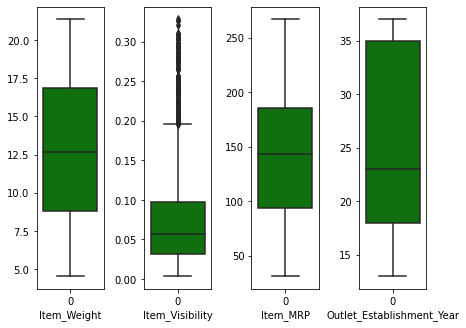

In [100]:
col=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
plt.figure(figsize=(30,90))
for i in range(len(col)):
    plt.subplot(20,20,i+1)
    sns.boxplot(data=df[col[i]],color='green',orient='v')
    plt.xlabel(col[i])
    plt.tight_layout()

There is outlier in Item_Visibility so we need to treat it.

## Checking Skewness

In [101]:
df.skew()

Item_Identifier             -0.008877
Item_Weight                  0.070332
Item_Fat_Content             0.994824
Item_Visibility              1.233294
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year    0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

There is skewness in Item_Visibility, taking the range of skewness as (-0.25,0.25) and other features are categorical so no need to treat skewness in them.

## Checking skewness of Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year using dist plot

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

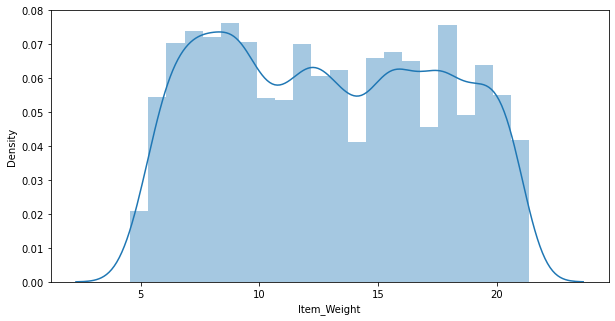

In [102]:
# for feature Item_Weight
plt.figure(figsize=(10,5))
sns.distplot(df['Item_Weight'])

Seems to be normally distributed but not perfectly distributed.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

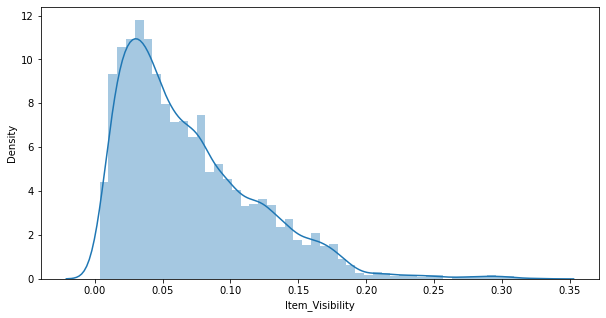

In [103]:
# for feature Item_Visibility
plt.figure(figsize=(10,5))
sns.distplot(df['Item_Visibility'])

Since most of the values in Item_Visibility feature is 0 which doesnot make any sense so we will assign mean in place of 0.

It is skewed towards right i.e. it is rightly skewed.

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

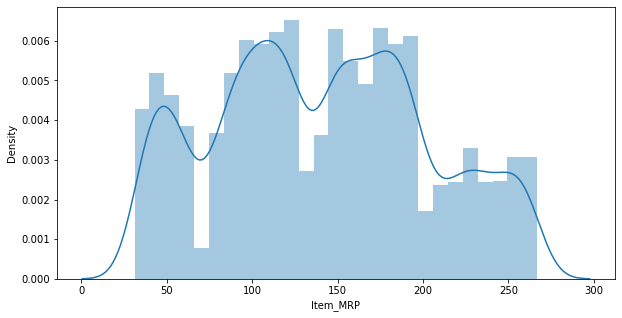

In [104]:
# for feature Item_MRP
plt.figure(figsize=(10,5))
sns.distplot(df['Item_MRP'])

Seems to be normally distributed but not perfectly distributed.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

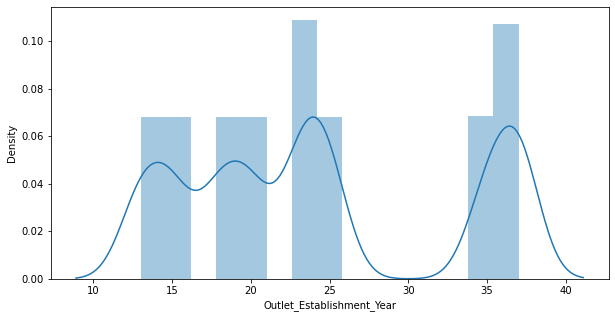

In [105]:
# for feature Outlet_Establishment_Year
plt.figure(figsize=(10,5))
sns.distplot(df['Outlet_Establishment_Year'])

It is bimodal and not at all normally distributed.

## Treating Outliers in Item_Visibility feature


In [106]:
#Getting sure of outliers using z score

df_z=df['Item_Visibility']

z=np.abs(zscore(df_z))
i=np.where(z>3)
print("Outliers index-\n",set(i[0]))
print("\n\nNumber of rows to be eliminated-\n",len(set(i[0])))

Outliers index-
 {8194, 521, 6674, 532, 8215, 1560, 2586, 5150, 6179, 1575, 2088, 7215, 4656, 49, 2613, 7744, 4674, 2122, 8273, 7250, 83, 5732, 5734, 108, 1644, 7278, 1651, 4219, 6786, 3206, 1159, 8345, 5795, 3750, 5287, 2728, 174, 4789, 3767, 7866, 2251, 5837, 7388, 8432, 6903, 5880, 1272, 5374, 5891, 1291, 1805, 7949, 2324, 4382, 1311, 1827, 2855, 1324, 3884, 1841, 4408, 5946, 3399, 7499, 4941, 847, 2895, 854, 7005, 6008, 4987, 6012, 3458, 7558, 2439, 6536, 2445, 3474, 3993, 1434, 3488, 4006, 5031, 3497, 6576, 7088, 434, 4530, 7603, 7107, 3017, 7121, 3540, 1496, 1501, 6622, 502}


Number of rows to be eliminated-
 97


In [107]:
#Calculating Data Loss
loss=((8523-97)/8523)*100
print("The data loss-",100-loss,"%")

The data loss- 1.1380969142320794 %


Since the data loss is just 1% so we will just remove all the rows with outliers from the data set.

In [108]:
#removing rows with outliers
df_new=df.drop(df.index[i[0]])
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,23,1.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,13,1.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,23,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.015274,6.0,182.0950,0.0,24,1.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.008082,9.0,53.8614,1.0,35,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,35,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,20,1.0,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,18,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,13,1.0,2.0,2.0,1845.5976


## Checking skewness again of Item_Visibility feature after removing outliers

In [109]:
df_new.skew()

Item_Identifier             -0.008566
Item_Weight                  0.069639
Item_Fat_Content             1.009768
Item_Visibility              0.841547
Item_Type                    0.100884
Item_MRP                     0.128784
Outlet_Identifier           -0.067513
Outlet_Establishment_Year    0.409420
Outlet_Size                 -0.082818
Outlet_Location_Type        -0.213342
Outlet_Type                  0.947509
Item_Outlet_Sales            1.173019
dtype: float64

In [110]:
x=df_new.drop(['Item_Outlet_Sales'],axis=1)
y=df_new['Item_Outlet_Sales']

## Treating skewness

In [111]:
#using yeo-johnson transformation
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-1.46004004, -0.73447476, -0.52081852, ..., -0.28542492,
        -1.38020227, -0.14562434],
       [-2.09345006, -1.59869925,  1.01149293, ..., -0.28542492,
         1.08975906,  1.03458519],
       [-0.15391282,  0.99015346, -0.52081852, ..., -0.28542492,
        -1.38020227, -0.14562434],
       ...,
       [ 1.20405441, -0.43261362, -0.52081852, ...,  1.39836388,
        -0.13732176, -0.14562434],
       [-0.11250433, -1.25288762,  1.01149293, ..., -0.28542492,
         1.08975906,  1.03458519],
       [-1.86165862,  0.46314041, -0.52081852, ...,  1.39836388,
        -1.38020227, -0.14562434]])

In [112]:
col=df_new.drop(['Item_Outlet_Sales'],axis=1).columns
df_s=pd.DataFrame(x,columns=col)
df_s

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-1.460040,-0.734475,-0.520819,-1.379645,-0.713603,1.622642,1.423077,0.044382,-0.285425,-1.380202,-0.145624
1,-2.093450,-1.598699,1.011493,-1.252725,1.505679,-1.595508,-0.562236,-1.590617,-0.285425,1.089759,1.034585
2,-0.153913,0.990153,-0.520819,-1.351282,0.684316,0.081493,1.423077,0.044382,-0.285425,-1.380202,-0.145624
3,0.772269,1.306692,1.011493,-1.410666,-0.216377,0.689892,-1.820397,0.166021,-0.285425,1.089759,-1.975712
4,1.096473,-0.823046,-0.520819,-1.711190,0.468090,-1.476409,-1.357205,1.239129,-1.921662,1.089759,-0.145624
...,...,...,...,...,...,...,...,...,...,...,...
8421,-0.843614,-1.343171,-0.520819,-0.047232,1.306036,1.147776,-1.357205,1.239129,-1.921662,1.089759,-0.145624
8422,0.337512,-0.957107,1.011493,-0.319844,-1.924800,-0.462808,0.802159,-0.355643,-0.285425,-0.137322,-0.145624
8423,1.204054,-0.432614,-0.520819,-0.685386,0.246445,-0.867735,0.479067,-0.657625,1.398364,-0.137322,-0.145624
8424,-0.112504,-1.252888,1.011493,1.528702,1.306036,-0.548690,-0.562236,-1.590617,-0.285425,1.089759,1.034585


In [113]:
df_s.skew()

Item_Identifier             -0.293633
Item_Weight                 -0.089679
Item_Fat_Content             0.031617
Item_Visibility              0.144708
Item_Type                   -0.164453
Item_MRP                    -0.115028
Outlet_Identifier           -0.214770
Outlet_Establishment_Year    0.007991
Outlet_Size                 -0.041741
Outlet_Location_Type        -0.221260
Outlet_Type                  0.009323
dtype: float64

Skewness is treated now and its within range of (-0.25,0.25).

## Standardization of data set

In [114]:

scaler=StandardScaler()
x=scaler.fit_transform(df_s)
x

array([[-1.46004004, -0.73447476, -0.52081852, ..., -0.28542492,
        -1.38020227, -0.14562434],
       [-2.09345006, -1.59869925,  1.01149293, ..., -0.28542492,
         1.08975906,  1.03458519],
       [-0.15391282,  0.99015346, -0.52081852, ..., -0.28542492,
        -1.38020227, -0.14562434],
       ...,
       [ 1.20405441, -0.43261362, -0.52081852, ...,  1.39836388,
        -0.13732176, -0.14562434],
       [-0.11250433, -1.25288762,  1.01149293, ..., -0.28542492,
         1.08975906,  1.03458519],
       [-1.86165862,  0.46314041, -0.52081852, ...,  1.39836388,
        -1.38020227, -0.14562434]])

## Train test split

In [115]:
from sklearn.linear_model import LinearRegression
max_ac=0
randomState=0
lr=LinearRegression()
for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("\n\nAt random state:",i)
        print("\nTrain Accuracy- ",round(r2_score(y_train,pred_train)*100,1))
        print("\nTest Accuracy- ",round(r2_score(y_test,pred_test)*100,1))
        if round(r2_score(y_test,pred_test)*100,1)>max_ac:
            randomState=i
            max_ac=round(r2_score(y_test,pred_test)*100,1)
print("\n\n Best accuracy at random state-",randomState)



At random state: 34

Train Accuracy-  52.1

Test Accuracy-  52.1


At random state: 67

Train Accuracy-  52.1

Test Accuracy-  52.1


At random state: 103

Train Accuracy-  52.1

Test Accuracy-  52.1


At random state: 110

Train Accuracy-  52.1

Test Accuracy-  52.1


At random state: 121

Train Accuracy-  52.1

Test Accuracy-  52.1


At random state: 187

Train Accuracy-  52.1

Test Accuracy-  52.1


At random state: 204

Train Accuracy-  52.1

Test Accuracy-  52.1


At random state: 225

Train Accuracy-  52.1

Test Accuracy-  52.1


At random state: 253

Train Accuracy-  52.1

Test Accuracy-  52.1


At random state: 257

Train Accuracy-  52.1

Test Accuracy-  52.1


At random state: 314

Train Accuracy-  52.1

Test Accuracy-  52.1


At random state: 391

Train Accuracy-  52.1

Test Accuracy-  52.1


At random state: 437

Train Accuracy-  52.1

Test Accuracy-  52.1


At random state: 459

Train Accuracy-  52.1

Test Accuracy-  52.1


 Best accuracy at random state- 34


## Fetching testing data

In [116]:
test_df_x=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
test_df_x.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## Applying Linear Regression algo on given training set

In [117]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=34,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_acc=round(r2_score(y_train,pred_train)*100,1)
test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",train_acc)
print("\nTest Accuracy- ",test_acc)



Train Accuracy-  52.1

Test Accuracy-  52.1


## Cross Validation Score

In [118]:
for i in range(4,30):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",test_acc)



At cv- 4

 cross validation score is- 51.80852246549266

 Accuracy score is- 52.1


At cv- 5

 cross validation score is- 51.924509913965835

 Accuracy score is- 52.1


At cv- 6

 cross validation score is- 51.89494178264523

 Accuracy score is- 52.1


At cv- 7

 cross validation score is- 51.9792774845391

 Accuracy score is- 52.1


At cv- 8

 cross validation score is- 51.887494609610016

 Accuracy score is- 52.1


At cv- 9

 cross validation score is- 51.92854133373723

 Accuracy score is- 52.1


At cv- 10

 cross validation score is- 51.85878281287566

 Accuracy score is- 52.1


At cv- 11

 cross validation score is- 51.92021816402964

 Accuracy score is- 52.1


At cv- 12

 cross validation score is- 51.86254756314565

 Accuracy score is- 52.1


At cv- 13

 cross validation score is- 51.867988195229756

 Accuracy score is- 52.1


At cv- 14

 cross validation score is- 51.86801127789651

 Accuracy score is- 52.1


At cv- 15

 cross validation score is- 51.85695938320277

 Accuracy

Best validation score is at cv=7

In [119]:
cv_score_best=cross_val_score(lr,x,y,cv=7).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for linear regression model is-",test_acc)

cross validation score is- 51.9792774845391
accuracy score for linear regression model is- 52.1


## Random Forest Regression

In [120]:
from sklearn.ensemble import RandomForestRegressor

In [121]:
rf=RandomForestRegressor()

In [122]:
max_ac=0
randomState=0

for i in range(20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    
    print("\n\nAt random state:",i)
    print("\nTrain Accuracy- ",round(r2_score(y_train,pred_train)*100,1))
    print("\nTest Accuracy- ",round(r2_score(y_test,pred_test)*100,1))
        
print("\n\n Best accuracy at random state-",randomState)



At random state: 0

Train Accuracy-  93.7

Test Accuracy-  55.6


At random state: 1

Train Accuracy-  93.7

Test Accuracy-  54.2


At random state: 2

Train Accuracy-  93.8

Test Accuracy-  54.2


At random state: 3

Train Accuracy-  93.8

Test Accuracy-  56.0


At random state: 4

Train Accuracy-  93.7

Test Accuracy-  56.1


At random state: 5

Train Accuracy-  93.6

Test Accuracy-  57.4


At random state: 6

Train Accuracy-  93.8

Test Accuracy-  56.6


At random state: 7

Train Accuracy-  93.7

Test Accuracy-  55.6


At random state: 8

Train Accuracy-  93.8

Test Accuracy-  53.8


At random state: 9

Train Accuracy-  93.7

Test Accuracy-  54.4


At random state: 10

Train Accuracy-  93.9

Test Accuracy-  51.8


At random state: 11

Train Accuracy-  93.7

Test Accuracy-  54.5


At random state: 12

Train Accuracy-  93.8

Test Accuracy-  53.4


At random state: 13

Train Accuracy-  93.8

Test Accuracy-  55.1


At random state: 14

Train Accuracy-  93.6

Test Accuracy-  57.7


At 

Best result at random state=6

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=6,test_size=0.20)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
train_acc=round(r2_score(y_train,pred_train)*100,1)
test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",train_acc)
print("\nTest Accuracy- ",test_acc)


Train Accuracy-  93.7

Test Accuracy-  56.3


## Cross validation score

In [124]:
for i in range(4,23):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",test_acc)



At cv- 4

 cross validation score is- 54.57322264268056

 Accuracy score is- 56.3


At cv- 5

 cross validation score is- 54.756377232747596

 Accuracy score is- 56.3


At cv- 6

 cross validation score is- 54.811840335544815

 Accuracy score is- 56.3


At cv- 7

 cross validation score is- 54.92470774305745

 Accuracy score is- 56.3


At cv- 8

 cross validation score is- 55.066594424459936

 Accuracy score is- 56.3


At cv- 9

 cross validation score is- 54.586390336496805

 Accuracy score is- 56.3


At cv- 10

 cross validation score is- 54.73016151415503

 Accuracy score is- 56.3


At cv- 11

 cross validation score is- 54.722391300739204

 Accuracy score is- 56.3


At cv- 12

 cross validation score is- 54.61660912137136

 Accuracy score is- 56.3


At cv- 13

 cross validation score is- 54.85454445649486

 Accuracy score is- 56.3


At cv- 14

 cross validation score is- 54.79810495703654

 Accuracy score is- 56.3


At cv- 15

 cross validation score is- 55.11904616129372

 Accur

In [125]:
cv_score_best=cross_val_score(rf,x,y,cv=22).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for random forest regression model is-",test_acc)

cross validation score is- 55.08876067482921
accuracy score for random forest regression model is- 56.3


Seems that the model is overfitted so lets remove overfitting using lasso technique.

## Treating model overfitting using LassoCV

In [126]:
from sklearn.linear_model import LassoCV,Lasso
lasscv=LassoCV(alphas=None,cv=10,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(cv=10, normalize=True)

In [127]:
alpha=lasscv.alpha_
alpha

0.06763997474224877

In [128]:
lassoReg=Lasso(alpha)
lassoReg.fit(x_train,y_train)

Lasso(alpha=0.06763997474224877)

In [129]:
lassoReg.score(x_train,y_train)*100

51.7163276110757

In [130]:
lassoReg.score(x_test,y_test)*100

53.73260454761428

## Knn Regressor

In [131]:
from sklearn.neighbors import KNeighborsRegressor

In [132]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [133]:
knn_pred_train=knn.predict(x_train)
knn_pred_test=knn.predict(x_test)

In [134]:
knn_acc_train=r2_score(y_train,knn_pred_train)
knn_acc_test=r2_score(y_test,knn_pred_test)
print("acc train",knn_acc_train*100)
print("acc test",knn_acc_test*100)

acc train 65.97122875760408
acc test 50.06692984386278


## Cross Validation score

In [135]:
for i in range(4,15):
    cv_score=cross_val_score(knn,x,y,cv=i)
    cv_mean=cv_score.mean()
    print("\n\nAt cv-",i)
    print("\n cross validation score is-",cv_mean*100)
    print("\n Accuracy score is-",knn_acc_test*100)



At cv- 4

 cross validation score is- 48.63595432262709

 Accuracy score is- 50.06692984386278


At cv- 5

 cross validation score is- 48.45724839413902

 Accuracy score is- 50.06692984386278


At cv- 6

 cross validation score is- 49.1459094058261

 Accuracy score is- 50.06692984386278


At cv- 7

 cross validation score is- 49.23618738446291

 Accuracy score is- 50.06692984386278


At cv- 8

 cross validation score is- 49.42606096337357

 Accuracy score is- 50.06692984386278


At cv- 9

 cross validation score is- 48.93167644959827

 Accuracy score is- 50.06692984386278


At cv- 10

 cross validation score is- 49.05879604250395

 Accuracy score is- 50.06692984386278


At cv- 11

 cross validation score is- 48.71515480856848

 Accuracy score is- 50.06692984386278


At cv- 12

 cross validation score is- 49.3146829879799

 Accuracy score is- 50.06692984386278


At cv- 13

 cross validation score is- 49.13183038207774

 Accuracy score is- 50.06692984386278


At cv- 14

 cross validati

So we are getting the least difference between cross_val_score and accuracy score at cv=8

In [136]:
cv_score_best=cross_val_score(knn,x,y,cv=8).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for K Nearest classifier model is-",knn_acc_test*100)

cross validation score is- 49.42606096337357
accuracy score for K Nearest classifier model is- 50.06692984386278


## Since Linear Regression model has the least difference between CV score and model accuracy but we cannot perform hyper parameter tunig on it  so lets try to increase the performance of random forest regressor by hyper parameter tuning

## Hyper Parameter tuning on Random Forest Regressor

In [137]:
param_grid = {
    "n_estimators":[100,200,300],
    "max_depth":[10, 50, 100],
    "max_features":[6,8,10,12,14,16]
}

rf_reg = RandomForestRegressor()

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(x_train, y_train)
rf_reg_tuned.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


RandomForestRegressor(max_depth=10, max_features=6, n_estimators=300)

In [138]:
rf=RandomForestRegressor(n_estimators=300,max_depth=10,max_features=6)
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
train_acc=round(r2_score(y_train,pred_train)*100,1)
test_acc=round(r2_score(y_test,pred_test)*100,1)
print("\nTrain Accuracy- ",train_acc)
print("\nTest Accuracy- ",test_acc)


Train Accuracy-  70.7

Test Accuracy-  60.4


Test accuracy improved to 60.4%.

## Cross Validation Score

In [139]:
cv_score_best=cross_val_score(rf,x,y,cv=22).mean()*100
print("cross validation score is-",cv_score_best)
print("accuracy score for random forest regression model is-",test_acc)

cross validation score is- 58.557520318043046
accuracy score for random forest regression model is- 60.4


## Our model is ready to use, Lets apply this on test data

In [140]:
test_df_x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [141]:
test_df_x.shape

(5681, 11)

In [142]:
test_df_x.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [143]:
# Removing nulls
test_df_x['Item_Weight'] = test_df_x['Item_Weight'].fillna(test_df_x.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [144]:
test_df_x['Item_Weight'] = test_df_x['Item_Weight'].fillna(test_df_x['Item_Weight'].mean())

In [145]:
test_df_x['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [146]:
test_df_x['Outlet_Size'] =test_df_x['Outlet_Size'].fillna("Medium")

In [147]:
test_df_x.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [148]:
#encoding
oe=OrdinalEncoder()
df1=oe.fit_transform(test_df_x[['Item_Identifier']])
test_df_x['Item_Identifier']=df1
df1=oe.fit_transform(test_df_x[['Item_Fat_Content']])
test_df_x['Item_Fat_Content']=df1
df1=oe.fit_transform(test_df_x[['Item_Type']])
test_df_x['Item_Type']=df1
df1=oe.fit_transform(test_df_x[['Outlet_Identifier']])
test_df_x['Outlet_Identifier']=df1
df1=oe.fit_transform(test_df_x[['Outlet_Size']])
test_df_x['Outlet_Size']=df1
df1=oe.fit_transform(test_df_x[['Outlet_Location_Type']])
test_df_x['Outlet_Location_Type']=df1
df1=oe.fit_transform(test_df_x[['Outlet_Type']])
test_df_x['Outlet_Type']=df1
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,1.0,0.016047,4.0,249.8092,9.0,23,1.0,0.0,1.0,3735.1380
1,8.0,5.92,2.0,0.019278,14.0,48.2692,3.0,13,1.0,2.0,2.0,443.4228
2,662.0,17.50,1.0,0.016760,10.0,141.6180,9.0,23,1.0,0.0,1.0,2097.2700
3,1121.0,19.20,2.0,0.015274,6.0,182.0950,0.0,24,1.0,2.0,0.0,732.3800
4,1297.0,8.93,1.0,0.008082,9.0,53.8614,1.0,35,0.0,2.0,1.0,994.7052


In [149]:
#Checking skewness
test_df_x.skew()

Item_Identifier             -0.000020
Item_Weight                  0.144817
Item_Fat_Content             0.999629
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

In [150]:
# Treating skewness
#using yeo-johnson transformation
from sklearn.preprocessing import power_transform
x=power_transform(test_df_x,method='yeo-johnson')
x

array([[ 0.75746742,  1.59192608, -0.5240889 , ..., -0.29345691,
        -1.37374464, -0.12353311],
       [ 0.68861828, -0.92578277,  3.19413231, ..., -0.29345691,
        -0.13101959, -0.12353311],
       [ 1.31359527,  0.48239385, -0.5240889 , ..., -0.29345691,
         1.08829997, -1.91575348],
       ...,
       [ 1.32423381, -0.50676747, -0.5240889 , ..., -0.29345691,
        -0.13101959, -0.12353311],
       [-0.47261831,  0.61891302,  1.01563473, ..., -0.29345691,
        -0.13101959, -0.12353311],
       [ 0.53315531, -0.62630649,  1.01563473, ..., -0.29345691,
        -0.13101959, -0.12353311]])

In [151]:
#standardization of data
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.75746742,  1.59192608, -0.5240889 , ..., -0.29345691,
        -1.37374464, -0.12353311],
       [ 0.68861828, -0.92578277,  3.19413231, ..., -0.29345691,
        -0.13101959, -0.12353311],
       [ 1.31359527,  0.48239385, -0.5240889 , ..., -0.29345691,
         1.08829997, -1.91575348],
       ...,
       [ 1.32423381, -0.50676747, -0.5240889 , ..., -0.29345691,
        -0.13101959, -0.12353311],
       [-0.47261831,  0.61891302,  1.01563473, ..., -0.29345691,
        -0.13101959, -0.12353311],
       [ 0.53315531, -0.62630649,  1.01563473, ..., -0.29345691,
        -0.13101959, -0.12353311]])

In [152]:
## Getting the values of Outlet_Sales
pred_test=rf.predict(x)
print(pred_test)

[1586.85283148 1324.60709527  819.51147336 ... 1942.83414267 3743.89715018
 1266.69615215]


In [153]:
#Appending output sales in test dataset
test_df_x['Outlet_Sales']=pred_test
test_df_x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Sales
0,1103.0,20.750,1.0,0.007565,13.0,107.8622,9.0,1999,1.0,0.0,1.0,1586.852831
1,1067.0,8.300,4.0,0.038428,4.0,87.3198,2.0,2007,1.0,1.0,1.0,1324.607095
2,1406.0,14.600,1.0,0.099575,11.0,241.7538,0.0,1998,1.0,2.0,0.0,819.511473
3,809.0,7.315,1.0,0.015388,13.0,155.0340,2.0,2007,1.0,1.0,1.0,2432.176741
4,1184.0,13.600,2.0,0.118599,4.0,234.2300,5.0,1985,1.0,2.0,3.0,4912.690680


## Saving the model

In [154]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rf, open(filename, 'wb'))